<a href="https://colab.research.google.com/github/SerbC/2025S1CV1/blob/main/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# MASTER PLAN
# Importam datele                               Done
# Verificarea Integritatii datelor              Done
# Impartirea datelor in Train Test [Val]        Done
# Preprocesarea Datelor:                        Not Done
#   * Normalizarea si augumentarea datelor [D]  Not Done
#   * Analiza datelor                           Not Done
#   * Resize                                    Not Done
#   * Hand segmentation                         Not Done
#   * Hand extraction                           Not Done
# Extragem trasaturile                          Not Done
# Clasificare                                   Not Done
# PR curve / Matricea de confuzie               Not Done

In [1]:
#   Matrice de confuzie pentru un clasificator binar
#
#               1   |  0
#   pred T    100 % |   0
#           ________|_________
#   pred N     0    |  100%
#                   |


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import cv2

import random

In [10]:
bp = "/content/drive/MyDrive/fac/Laborator/Images/"

file_path_arr = []
for i in range(4):
  file_path_arr.append(glob(bp+str(i)+"/*.jpg"))
print(len(file_path_arr))
print(file_path_arr)
print(np.shape(file_path_arr))

4
[['/content/drive/MyDrive/fac/Laborator/Images/0/0.jpg', '/content/drive/MyDrive/fac/Laborator/Images/0/1.jpg', '/content/drive/MyDrive/fac/Laborator/Images/0/2.jpg', '/content/drive/MyDrive/fac/Laborator/Images/0/3.jpg', '/content/drive/MyDrive/fac/Laborator/Images/0/4.jpg', '/content/drive/MyDrive/fac/Laborator/Images/0/5.jpg', '/content/drive/MyDrive/fac/Laborator/Images/0/6.jpg', '/content/drive/MyDrive/fac/Laborator/Images/0/7.jpg', '/content/drive/MyDrive/fac/Laborator/Images/0/8.jpg', '/content/drive/MyDrive/fac/Laborator/Images/0/9.jpg'], ['/content/drive/MyDrive/fac/Laborator/Images/1/0.jpg', '/content/drive/MyDrive/fac/Laborator/Images/1/1.jpg', '/content/drive/MyDrive/fac/Laborator/Images/1/2.jpg', '/content/drive/MyDrive/fac/Laborator/Images/1/3.jpg', '/content/drive/MyDrive/fac/Laborator/Images/1/4.jpg', '/content/drive/MyDrive/fac/Laborator/Images/1/5.jpg', '/content/drive/MyDrive/fac/Laborator/Images/1/6.jpg', '/content/drive/MyDrive/fac/Laborator/Images/1/7.jpg', '/co

In [7]:
random.seed(42)

In [8]:
image_index_arr = random.sample(range(0,9),7)
print(image_index_arr)

[1, 0, 5, 2, 8, 4, 7]


In [9]:
train_image_path = []
test_image_path = []

for hand_class in file_path_arr:
  tmp_train = []
  tmp_test = []
  for i in range(10):
    if i not in image_index_arr:
      tmp_test.append(hand_class[i])
    else:
      tmp_train.append(hand_class[i])
  train_image_path.append(tmp_train)
  test_image_path.append(tmp_test)
print(np.shape(train_image_path))
print(np.shape(test_image_path))

(4, 7)
(4, 3)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [12]:
train_images = []
test_images = []

for cls in train_image_path:
  t = []
  for i in cls:
    t.append(cv2.imread(i))
  train_images.append(t)

for cls in test_image_path:
  t = []
  for i in cls:
    t.append(cv2.imread(i))
  test_images.append(t)

print(np.shape(train_images))
print(np.shape(test_images))

(4, 7, 4032, 1908, 3)
(4, 3, 4032, 1908, 3)


(<Figure size 640x480 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x7e963c9afb90>)

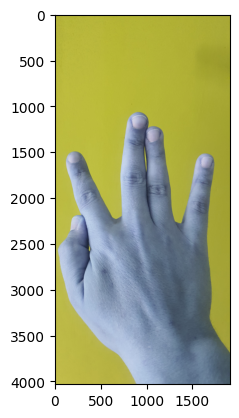

In [13]:
plt.figure(), plt.imshow(train_images[0][0])

(<Figure size 640x480 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x7e963cb14ef0>)

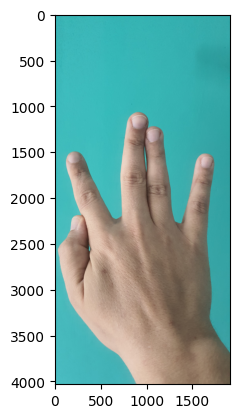

In [14]:
im = train_images[0][0]
img_rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.figure(), plt.imshow(img_rgb)

In [15]:
print(np.shape(img_rgb))

(4032, 1908, 3)


In [ ]:
# RESIZE ALL
# CONVERT TO CORRECT COLOR SPACE

In [18]:
def resize_and_covert(image, scale_factor = 10):
  w, h, _ = np.shape(image)
  im_resized = cv2.resize(image, (int(h/scale_factor), int(w/scale_factor)))
  img_rgb = cv2.cvtColor(im_resized, cv2.COLOR_BGR2RGB)
  return img_rgb


In [21]:
for i,cls in enumerate(train_images):
  for j,im in enumerate(cls):
    train_images[i][j] = resize_and_covert(im)

for i,cls in enumerate(test_images):
  for j,im in enumerate(cls):
    test_images[i][j] = resize_and_covert(im)

(<Figure size 640x480 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x7e9627d966f0>)

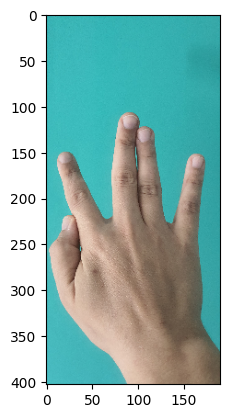

In [22]:
plt.figure(), plt.imshow(train_images[0][0])